In [1]:
"""
word clouds
"""

'\ntopic modeling of r/technews posts\n'

In [7]:
import pandas as pd
import numpy as np
import pickle
import datetime

import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

In [2]:
with open('topics_posts.pickle', 'rb') as read_file:
    posts = pickle.load(read_file)
    
posts.shape

(48082, 19)

In [3]:
posts.head()

,id,created_utc,date_time,author,author_fullname,title,url,domain,num_comments,score,permalink,full_link,refine_title,preproc_title,unstemmed,stem_title,processed_title,title_nouns,post_topic_nmf
0,29j6ov,1404184792,2014-07-01 03:19:52,Password_is_123456,t2_6crtu,New leaks show off the iPhone 6's curved edged...,http://www.cnet.com/news/new-leaks-show-off-up...,cnet.com,0,0,/r/technews/comments/29j6ov/new_leaks_show_off...,https://www.reddit.com/r/technews/comments/29j...,New leaks show off the iPhone 6's curved edged...,New leaks show off the iPhone s curved edged...,"[New, leaks, show, off, the, iPhone, s, curved...","[new, leak, show, off, the, iphon, s, curv, ed...",new leak show off the iphon s curv edg display,New leaks iPhone s display,11
1,29j6op,1404184791,2014-07-01 03:19:51,Password_is_123456,t2_6crtu,Millions of dynamic DNS users suffer after Mic...,http://arstechnica.com/security/2014/06/millio...,arstechnica.com,6,63,/r/technews/comments/29j6op/millions_of_dynami...,https://www.reddit.com/r/technews/comments/29j...,Millions of dynamic DNS users suffer after Mic...,Millions of dynamic DNS users suffer after Mic...,"[Millions, of, dynamic, DNS, users, suffer, af...","[million, of, dynam, dns, user, suffer, after,...",million of dynam dns user suffer after microso...,Millions DNS users Microsoft IP domains,13
2,29j2c1,1404181722,2014-07-01 02:28:42,[deleted],NaN,Paypal Freezes ProtonMail Campaign Funds,https://protonmail.ch/blog/paypal-freezes-prot...,protonmail.ch,0,1,/r/technews/comments/29j2c1/paypal_freezes_pro...,https://www.reddit.com/r/technews/comments/29j...,Paypal Freezes ProtonMail Campaign Funds,Paypal Freezes ProtonMail Campaign Funds,"[Paypal, Freezes, ProtonMail, Campaign, Funds]","[paypal, freez, protonmail, campaign, fund]",paypal freez protonmail campaign fund,Paypal Freezes ProtonMail Campaign Funds,3
3,29hy6f,1404156644,2014-06-30 19:30:44,ANIMAL_NewYork,t2_h1mjr,UNETHICAL FACEBOOK “EMOTIONAL CONTAGION” STUDY...,http://animalnewyork.com/2014/facebook-emotion...,animalnewyork.com,0,1,/r/technews/comments/29hy6f/unethical_facebook...,https://www.reddit.com/r/technews/comments/29h...,UNETHICAL FACEBOOK “EMOTIONAL CONTAGION” STUDY...,UNETHICAL FACEBOOK “EMOTIONAL CONTAGION” STUDY...,"[UNETHICAL, FACEBOOK, “EMOTIONAL, CONTAGION”, ...","[uneth, facebook, “emot, contagion”, studi, no...",uneth facebook “emot contagion” studi not fund...,FACEBOOK “ EMOTIONAL CONTAGION ” STUDY NOT FUN...,3
4,29hvyr,1404155395,2014-06-30 19:09:55,Password_is_123456,t2_6crtu,Microsoft May Prioritize The Desktop In Windows 9,http://techcrunch.com/2014/06/30/microsoft-may...,techcrunch.com,23,53,/r/technews/comments/29hvyr/microsoft_may_prio...,https://www.reddit.com/r/technews/comments/29h...,Microsoft May Prioritize The Desktop In Windows 9,Microsoft May Prioritize The Desktop In Windows,"[Microsoft, May, Prioritize, The, Desktop, In,...","[microsoft, may, priorit, the, desktop, in, wi...",microsoft may priorit the desktop in window,Microsoft May Desktop Windows,13


In [4]:
text1 = " ".join(post for post in posts['title_nouns'])

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['new', 'news', 'tech', '&amp;', 'amp', 'million', 'billion'] )


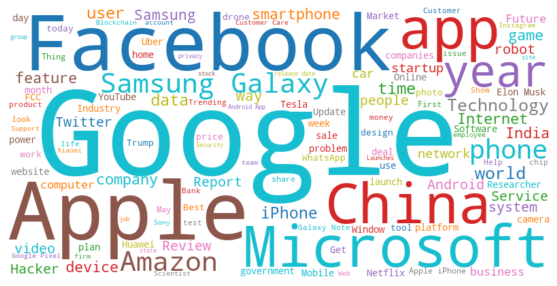

In [10]:
# Generate a word cloud image
wordcloud = WordCloud(width=800,
                      height=400, 
                      stopwords=stopwords,
                      background_color='white',
                      min_word_length=3,
                      colormap='tab10',
                      min_font_size=9,
                      random_state=0,
                      collocations=True,
                      collocation_threshold=10,
                      #max_font_size=8,
                      prefer_horizontal=1).generate(text1)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.show()
plt.savefig("technews_word_cloud.png")

In [14]:
# topic with Artificial Intelligence and Machine Learning
ai_posts = posts[posts['post_topic_nmf'] ==16]


In [15]:
text2 = " ".join(post for post in ai_posts['title_nouns'])

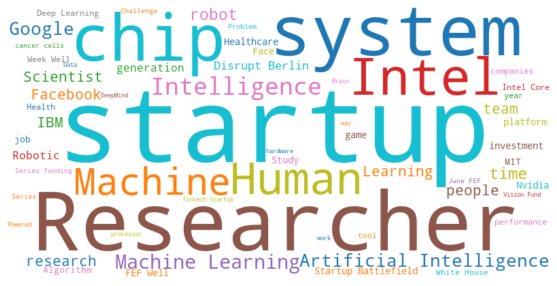

In [17]:
# Generate a word cloud image
wordcloud = WordCloud(width=800,
                      height=400, 
                      stopwords=stopwords,
                      background_color='white',
                      min_word_length=3,
                      colormap='tab10',
                      min_font_size=9,
                      random_state=0,
                      collocations=True,
                      collocation_threshold=10,
                      #max_font_size=8,
                      prefer_horizontal=1).generate(text2)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#plt.show()
plt.savefig("AI_word_cloud.png")